In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from sklearn.cluster import KMeans, k_means 
from sklearn.decomposition import PCA 

In [ ]:
df = pd.read_csv("/content/sales_data_sample.csv",encoding='latin1') 

In [ ]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [ ]:
df.shape

(2823, 25)

In [ ]:
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,2.717676,7.092455,2003.81509,100.715551
std,92.085478,9.741443,20.174277,4.225841,1841.865106,1.203878,3.656633,0.69967,40.187912
min,10100.000000,6.000000,26.880000,1.000000,482.130000,1.000000,1.000000,2003.00000,33.000000
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,2.000000,4.000000,2003.00000,68.000000
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,3.000000,8.000000,2004.00000,99.000000
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,4.000000,11.000000,2004.00000,124.000000
max,10425.000000,97.000000,100.000000,18.000000,14082.800000,4.000000,12.000000,2005.00000,214.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [ ]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [ ]:
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [ ]:
df_drop  = ['ADDRESSLINE1', 'ADDRESSLINE2', 'STATUS','POSTALCODE', 'CITY', 'TERRITORY', 'PHONE', 'STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']
df = df.drop(df_drop, axis=1) 

In [ ]:
df.isnull().sum()

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [ ]:
df.dtypes

QUANTITYORDERED      int64
PRICEEACH          float64
ORDERLINENUMBER      int64
SALES              float64
ORDERDATE           object
QTR_ID               int64
MONTH_ID             int64
YEAR_ID              int64
PRODUCTLINE         object
MSRP                 int64
PRODUCTCODE         object
COUNTRY             object
DEALSIZE            object
dtype: object

In [ ]:
df.duplicated( keep='first').sum()

0

In [ ]:
df.isna().sum() 

QUANTITYORDERED    0
PRICEEACH          0
ORDERLINENUMBER    0
SALES              0
ORDERDATE          0
QTR_ID             0
MONTH_ID           0
YEAR_ID            0
PRODUCTLINE        0
MSRP               0
PRODUCTCODE        0
COUNTRY            0
DEALSIZE           0
dtype: int64

In [ ]:
df['COUNTRY'].unique()

array(['USA', 'France', 'Norway', 'Australia', 'Finland', 'Austria', 'UK',
       'Spain', 'Sweden', 'Singapore', 'Canada', 'Japan', 'Italy',
       'Denmark', 'Belgium', 'Philippines', 'Germany', 'Switzerland',
       'Ireland'], dtype=object)

In [ ]:
df['PRODUCTLINE'].unique()

array(['Motorcycles', 'Classic Cars', 'Trucks and Buses', 'Vintage Cars',
       'Planes', 'Ships', 'Trains'], dtype=object)

In [ ]:
df['DEALSIZE'].unique()

array(['Small', 'Medium', 'Large'], dtype=object)

In [ ]:
productline = pd.get_dummies(df['PRODUCTLINE']) 
Dealsize = pd.get_dummies(df['DEALSIZE'])

In [ ]:
df = pd.concat([df,productline,Dealsize], axis = 1)

In [ ]:
df


,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,...,Classic Cars,Motorcycles,Planes,Ships,Trains,Trucks and Buses,Vintage Cars,Large,Medium,Small
0,30,95.70,2,2871.00,2/24/2003 0:00,1,2,2003,Motorcycles,95,...,0,1,0,0,0,0,0,0,0,1
1,34,81.35,5,2765.90,5/7/2003 0:00,2,5,2003,Motorcycles,95,...,0,1,0,0,0,0,0,0,0,1
2,41,94.74,2,3884.34,7/1/2003 0:00,3,7,2003,Motorcycles,95,...,0,1,0,0,0,0,0,0,1,0
3,45,83.26,6,3746.70,8/25/2003 0:00,3,8,2003,Motorcycles,95,...,0,1,0,0,0,0,0,0,1,0
4,49,100.00,14,5205.27,10/10/2003 0:00,4,10,2003,Motorcycles,95,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,15,2244.40,12/2/2004 0:00,4,12,2004,Ships,54,...,0,0,0,1,0,0,0,0,0,1
2819,29,100.00,1,3978.51,1/31/2005 0:00,1,1,2005,Ships,54,...,0,0,0,1,0,0,0,0,1,0
2820,43,100.00,4,5417.57,3/1/2005 0:00,1,3,2005,Ships,54,...,0,0,0,1,0,0,0,0,1,0
2821,34,62.24,1,2116.16,3/28/2005 0:00,1,3,2005,Ships,54,...,0,0,0,1,0,0,0,0,0,1


In [ ]:
df_drop  = ['COUNTRY','PRODUCTLINE','DEALSIZE'] 
df = df.drop(df_drop, axis=1)

In [ ]:
df['PRODUCTCODE'] = pd.Categorical(df['PRODUCTCODE']).codes 

In [ ]:
df.drop('ORDERDATE', axis=1, inplace=True) 

In [ ]:
df.dtypes 

QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
MSRP                  int64
PRODUCTCODE            int8
Classic Cars          uint8
Motorcycles           uint8
Planes                uint8
Ships                 uint8
Trains                uint8
Trucks and Buses      uint8
Vintage Cars          uint8
Large                 uint8
Medium                uint8
Small                 uint8
dtype: object

In [ ]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
    distortions.append(kmeanModel.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
kmeanModel

KMeans(n_clusters=9)

In [ ]:
kmeanModel.cluster_centers_

array([[ 2.78648019e+01,  5.24658275e+01,  6.37995338e+00,
         1.39055103e+03,  2.69696970e+00,  7.06293706e+00,
         2.00382051e+03,  6.28461538e+01,  6.25337995e+01,
         2.98368298e-01,  1.09557110e-01,  1.09557110e-01,
         3.96270396e-02,  2.79720280e-02,  8.39160839e-02,
         3.31002331e-01,  2.08166817e-17, -1.16573418e-15,
         1.00000000e+00],
       [ 4.18703704e+01,  9.99025185e+01,  6.22592593e+00,
         5.58379426e+03,  2.70370370e+00,  7.07777778e+00,
         2.00379630e+03,  1.30714815e+02,  3.82000000e+01,
         4.62962963e-01,  1.03703704e-01,  5.55555556e-02,
         3.33333333e-02,  2.59259259e-02,  1.70370370e-01,
         1.48148148e-01,  2.08166817e-17,  1.00000000e+00,
        -8.32667268e-16],
       [ 3.54881210e+01,  9.31924406e+01,  6.49460043e+00,
         3.68045352e+03,  2.76673866e+00,  7.25917927e+00,
         2.00377322e+03,  1.07995680e+02,  5.28315335e+01,
         3.39092873e-01,  1.10151188e-01,  1.16630670e-01,
    

In [ ]:
kmeanModel.inertia_


236693732.4045472

In [ ]:

label = kmeanModel.labels_

In [ ]:
label

array([1, 1, 8, ..., 7, 4, 1], dtype=int32)

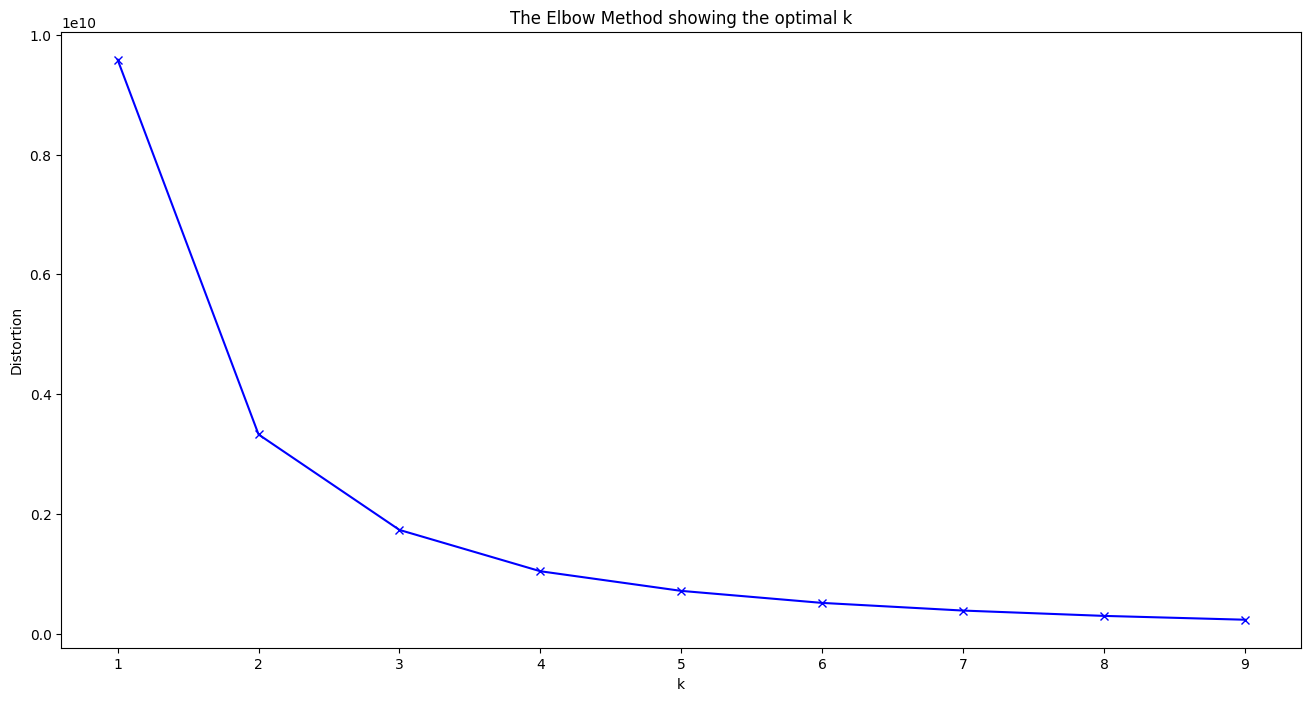

In [ ]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [ ]:
X_train = df.values #Returns a numpy array.

In [ ]:
X_train.shape

(2823, 19)

In [ ]:
model = KMeans(n_clusters=3,random_state=2) 
model = model.fit(X_train) 
predictions = model.predict(X_train) 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
predictions


array([1, 1, 0, ..., 0, 1, 1], dtype=int32)

In [ ]:
unique,counts = np.unique(predictions,return_counts=True)

In [ ]:
unique

array([0, 1, 2], dtype=int32)

In [ ]:
counts

array([1083, 1367,  373])

In [ ]:
counts = counts.reshape(1,3)   

In [ ]:
counts

array([[1083, 1367,  373]])

In [ ]:
counts_df = pd.DataFrame(counts,columns=['Cluster1','Cluster2','Cluster3'])

In [ ]:
counts_df.head()

,Cluster1,Cluster2,Cluster3
0,1083,1367,373


In [ ]:
pca = PCA(n_components=2) 

In [ ]:
reduced_X = pd.DataFrame(pca.fit_transform(X_train),columns=['PCA1','PCA2']) 

In [ ]:
reduced_X.head()

,PCA1,PCA2
0,-682.488323,-42.819535
1,-787.665502,-41.694991
2,330.732170,-26.481208
3,193.040232,-26.285766
4,1651.532874,-6.891196


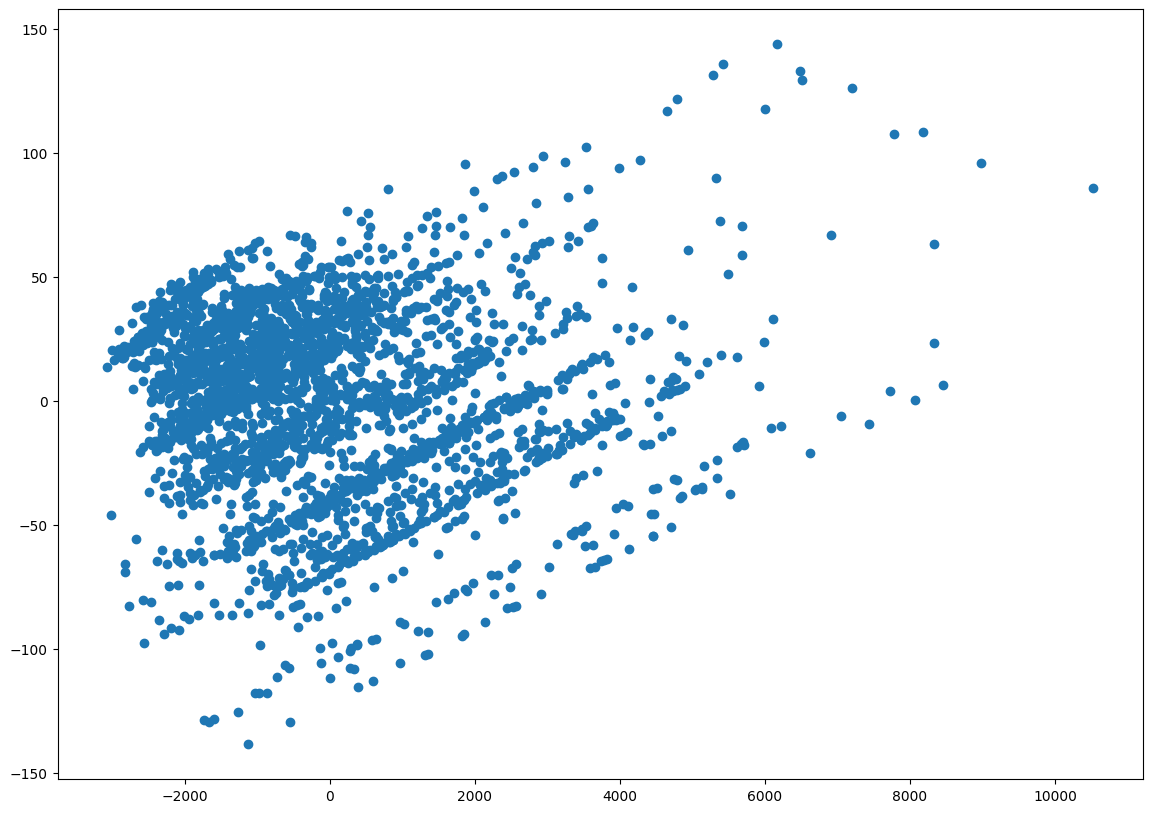

In [ ]:
plt.figure(figsize=(14,10))
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'])

In [ ]:
model.cluster_centers_ 

array([[ 3.72031394e+01,  9.52120960e+01,  6.44967682e+00,
         4.13868425e+03,  2.72022161e+00,  7.09879963e+00,
         2.00379409e+03,  1.13248384e+02,  5.04469067e+01,
         3.74884580e-01,  1.15420129e-01,  9.41828255e-02,
         8.21791320e-02,  1.84672207e-02,  1.16343490e-01,
         1.98522622e-01,  2.08166817e-17,  1.00000000e+00,
        -3.38618023e-15],
       [ 3.08302853e+01,  7.00755230e+01,  6.67300658e+00,
         2.12409474e+03,  2.71762985e+00,  7.09509876e+00,
         2.00381127e+03,  7.84784199e+01,  6.24871982e+01,
         2.64813460e-01,  1.21433797e-01,  1.29480614e-01,
         1.00219459e-01,  3.87710315e-02,  9.21726408e-02,
         2.53108998e-01,  6.93889390e-18,  6.21799561e-02,
         9.37820044e-01],
       [ 4.45871314e+01,  9.98931099e+01,  5.75603217e+00,
         7.09596863e+03,  2.71045576e+00,  7.06434316e+00,
         2.00389008e+03,  1.45823056e+02,  3.14959786e+01,
         5.33512064e-01,  1.07238606e-01,  7.23860590e-02,
    

In [ ]:
reduced_centers = pca.transform(model.cluster_centers_) 

In [ ]:
reduced_centers

array([[ 5.84994044e+02, -4.36786931e+00],
       [-1.43005891e+03,  2.60041009e+00],
       [ 3.54247180e+03,  3.15185487e+00]])

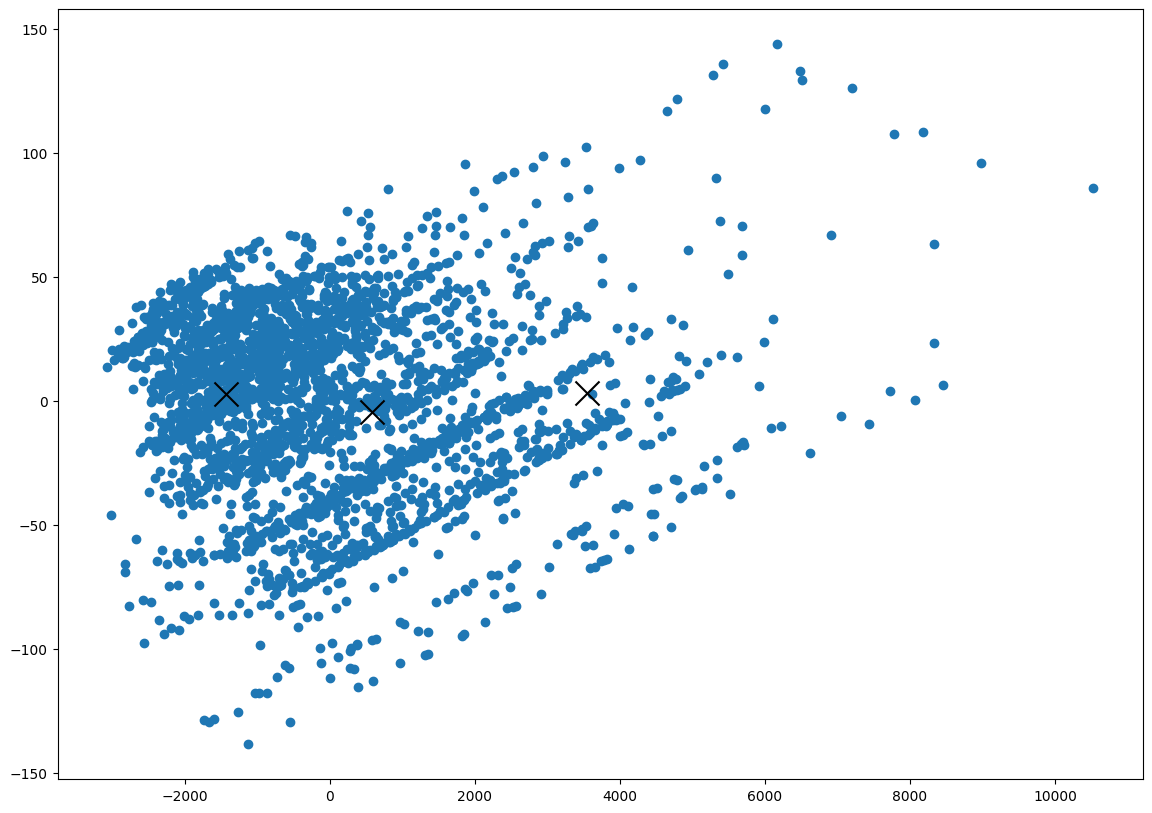

In [ ]:
plt.figure(figsize=(14,10))
plt.scatter(reduced_X['PCA1'],reduced_X['PCA2'])
plt.scatter(reduced_centers[:,0],reduced_centers[:,1],color='black',marker='x',s=300) 

In [ ]:
reduced_X['Clusters'] = predictions 

In [ ]:
reduced_X.head()

,PCA1,PCA2,Clusters
0,-682.488323,-42.819535,1
1,-787.665502,-41.694991,1
2,330.732170,-26.481208,0
3,193.040232,-26.285766,0
4,1651.532874,-6.891196,0


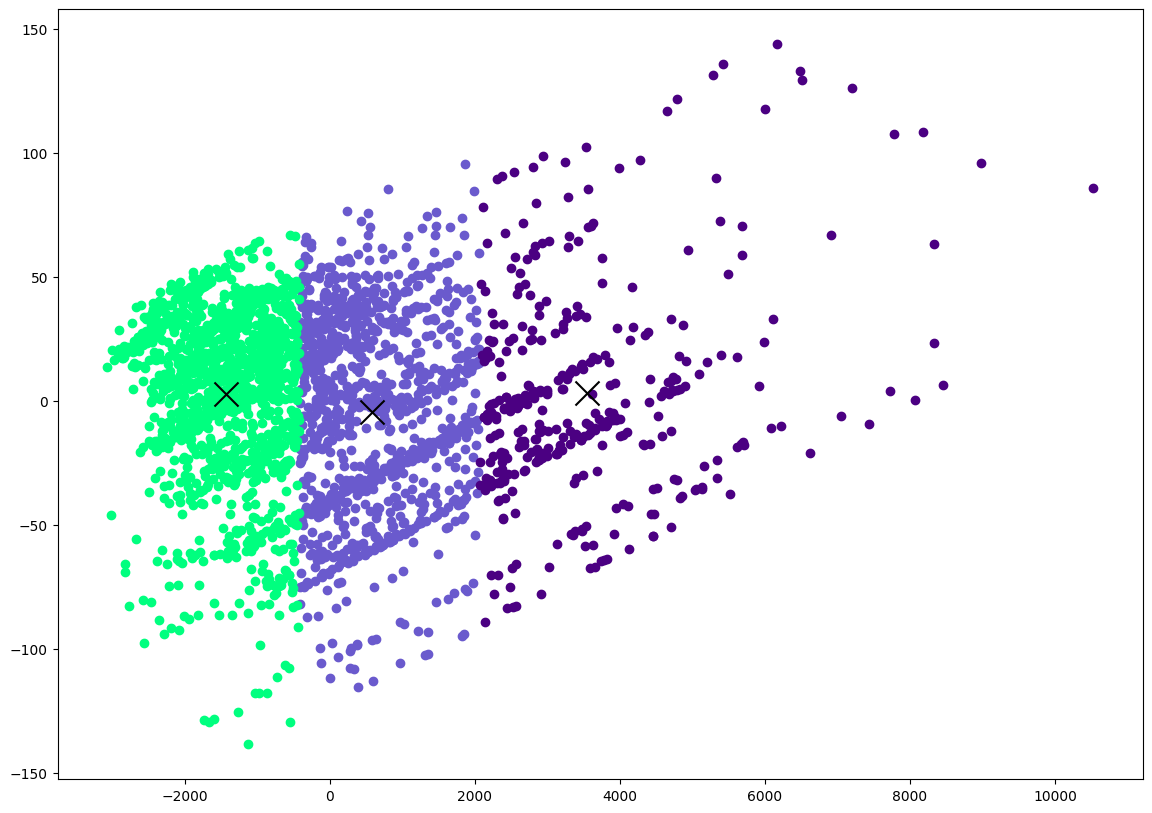

In [ ]:
plt.figure(figsize=(14,10))
plt.scatter(reduced_X[reduced_X['Clusters'] == 0].loc[:,'PCA1'],reduced_X[reduced_X['Clusters'] == 0].loc[:,'PCA2'],color='slateblue')
plt.scatter(reduced_X[reduced_X['Clusters'] == 1].loc[:,'PCA1'],reduced_X[reduced_X['Clusters'] == 1].loc[:,'PCA2'],color='springgreen')
plt.scatter(reduced_X[reduced_X['Clusters'] == 2].loc[:,'PCA1'],reduced_X[reduced_X['Clusters'] == 2].loc[:,'PCA2'],color='indigo')


plt.scatter(reduced_centers[:,0],reduced_centers[:,1],color='black',marker='x',s=300)